<a href="https://www.kaggle.com/code/abinshaibnuayyoob/classical-machine-learning-of-breast-cancer-data?scriptVersionId=191515627" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.cluster import KMeans
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv("/kaggle/input/cancer-data/Cancer_Data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.describe()


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [5]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

/tmp/ipykernel_347/1472073912.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<AxesSubplot: >

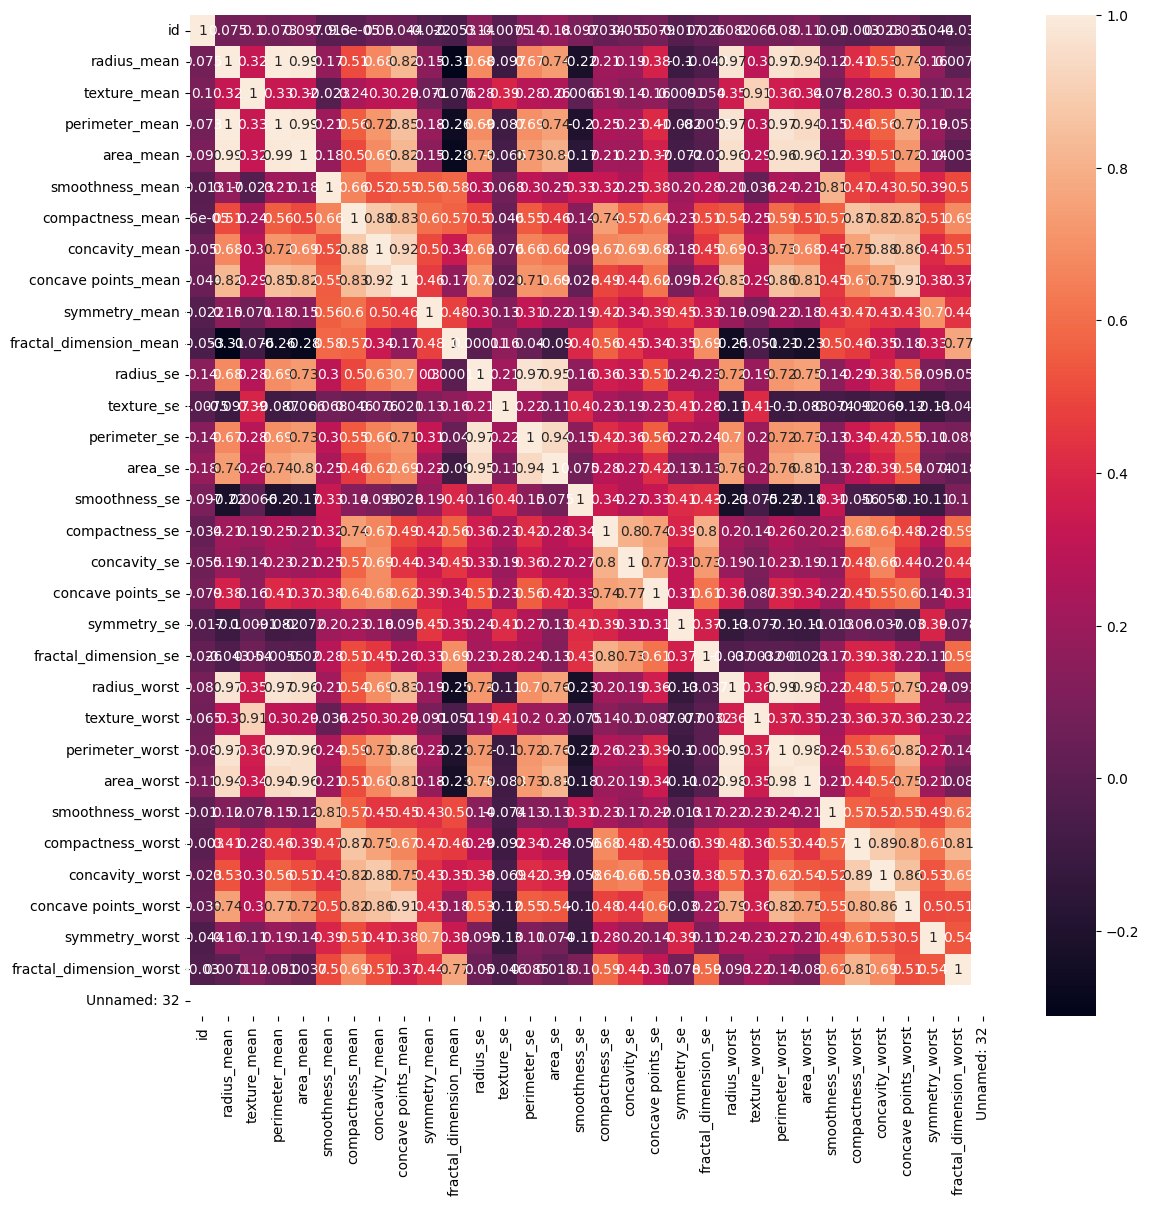

In [6]:
plt.figure(figsize=(13,13))
corr=df.corr()
sns.heatmap(corr,annot=True)

In [7]:
df_dup=df.duplicated("id",keep=False)
df_dup.unique()

array([False])

In [ ]:
'''there are two columns which are not usefull.so lets drop them.'''

In [8]:
df=df.drop(["Unnamed: 32","id"],axis=1)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
'''lets think about removing the outliers for making accurate predictions,
considering only values between 3*standard deviation.'''

/tmp/ipykernel_347/830837780.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["radius_mean"])


<AxesSubplot: xlabel='radius_mean', ylabel='Density'>

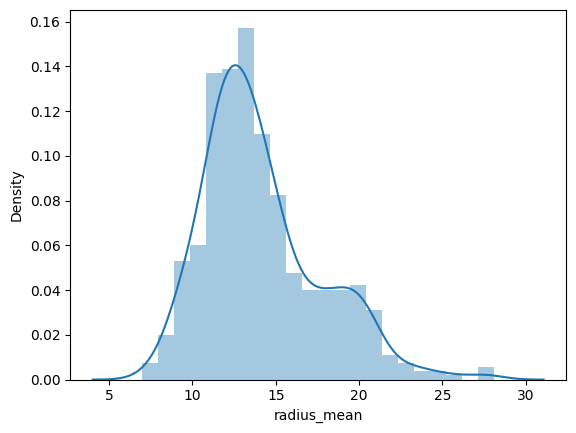

In [9]:
sns.distplot(df["radius_mean"])

/tmp/ipykernel_347/3668973386.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['texture_mean'])


<AxesSubplot: xlabel='texture_mean', ylabel='Density'>

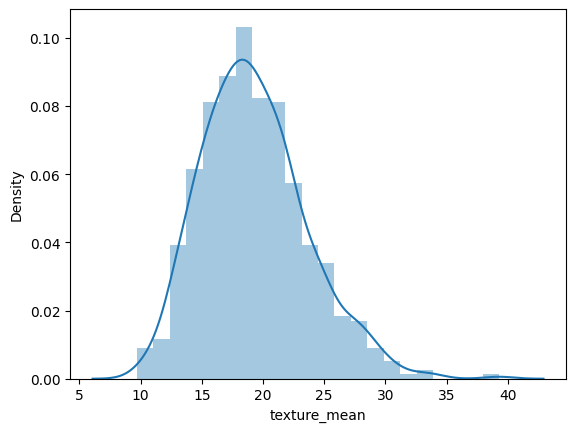

In [50]:
sns.distplot(df['texture_mean'])

In [10]:
df2=df.drop('diagnosis',axis=1)
column_names=df2.columns
column_names

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [12]:
for i in column_names:
    m=np.mean(df2[i])
    st=np.std(df2[i])
    df2[i]=df2[i][(df2[i]>(m-3*st))&(df2[i]<=(m+3*st))]
    

In [13]:
df2.isna().sum()

radius_mean                 5
texture_mean                4
perimeter_mean              7
area_mean                   8
smoothness_mean             5
compactness_mean            9
concavity_mean              9
concave points_mean         6
symmetry_mean               5
fractal_dimension_mean      7
radius_se                   7
texture_se                  9
perimeter_se                8
area_se                     6
smoothness_se               7
compactness_se             12
concavity_se                6
concave points_se           6
symmetry_se                11
fractal_dimension_se       10
radius_worst                6
texture_worst               4
perimeter_worst             6
area_worst                 10
smoothness_worst            3
compactness_worst          10
concavity_worst             7
concave points_worst        0
symmetry_worst              9
fractal_dimension_worst     9
dtype: int64

In [ ]:
'''there are 211 new nan values created in the dataset.if we drop
them all,a maximum of 211 rows may dropout.since our 
dataset is small, dropping that much of rows(data) is not good.so,lets 
dont bother about the outliers for now.'''

In [ ]:
'''lets plot swarmplot and boxenplot to get an insight about the 
data.'''

In [ ]:
pal=["#F98325","#C3FF33"]
for i in column_names:
    plt.figure()
    pl=sns.swarmplot(x=df['diagnosis'],y=df[i],color="#858EAB",size=3)
    pl=sns.boxenplot(x=df['diagnosis'],y=df[i],palette=pal)
    plt.show()


In [ ]:
'''the boxen and swarm plot gives relation of features with the type of cancerous cells. however lets 
use classical machine models to classify the two types, malignant and benign cells based on their features'''

**Classification using classical Machine Learning Models**

In [ ]:

'''using different machine learning models we classifies(predict) wheather 
a type of cancer is malignant or benign.
we train the model with a portion of data set and check 
wheather the model is compact enough to predict the same. if not, we 
calliberate the hyperparameters of the model and train the model
to achieve a desired score.'''


1. SVM

In [ ]:
'''in svm we uses the dimentionality reduction using PCA.The desired
output from this model is that we can plot the dataset
after classification and compare it with the plot of data before 
classification.'''

In [14]:
le=LabelEncoder()
df['diagnosis']=le.fit_transform(df['diagnosis'])

In [15]:
x=df.drop('diagnosis',axis=1)
y=df['diagnosis']

In [16]:
pca=PCA(n_components=3,random_state=42)
x1=pca.fit_transform(x)
x_pca=pd.DataFrame(x1,columns=['col1','col2','col3'])
x_pca

,col1,col2,col3
0,1160.142574,-293.917544,48.578398
1,1269.122443,15.630182,-35.394534
2,995.793889,39.156743,-1.709753
3,-407.180803,-67.380320,8.672848
4,930.341180,189.340742,1.374801
...,...,...,...
564,1414.126684,110.222492,40.065944
565,1045.018854,77.057589,0.036669
566,314.501756,47.553525,-10.442407
567,1124.858115,34.129225,-19.742087


In [17]:
scaler=StandardScaler()
X=scaler.fit_transform(x_pca)



In [18]:
x=pd.DataFrame(X,columns=x_pca.columns)
x

,col1,col2,col3
0,1.743043,-3.440692,1.832695
1,1.906779,0.182972,-1.335313
2,1.496120,0.458381,-0.064503
3,-0.611764,-0.788775,0.327197
4,1.397781,2.216483,0.051866
...,...,...,...
564,2.124639,1.290300,1.511549
565,1.570077,0.902061,0.001383
566,0.472520,0.556677,-0.393956
567,1.690031,0.399528,-0.744801


In [19]:
x_train_svm,x_test_svm,y_train_svm,y_test_svm=train_test_split(x,y,test_size=0.1,random_state=42)


In [20]:
param_grid_svc={
    'C':[0.1,1,10,100],
    'kernel':['linear','poly','rbf','sigmoid'],
    'gamma':['scale','auto',0.1,1],
    'degree':[2,3,4],
    'class_weight':[None,'balanced']
}
svc=SVC(random_state=42)
grid_search_svc=GridSearchCV(svc,param_grid_svc,cv=10,n_jobs=-1)
grid_search_svc.fit(x_train_svm,y_train_svm)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


GridSearchCV(cv=10, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto', 0.1, 1],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [21]:
y_pred_svm=grid_search_svc.predict(x_test_svm)

In [22]:
confusion_matrix=confusion_matrix(y_test_svm,y_pred_svm)
accuracy_svm=f1_score(y_test_svm,y_pred_svm)
accuracy_svm

0.9696969696969697

In [ ]:
'''we got a score of 97% for this model,and is a good score.
lets plot confusion matrix of the result.'''

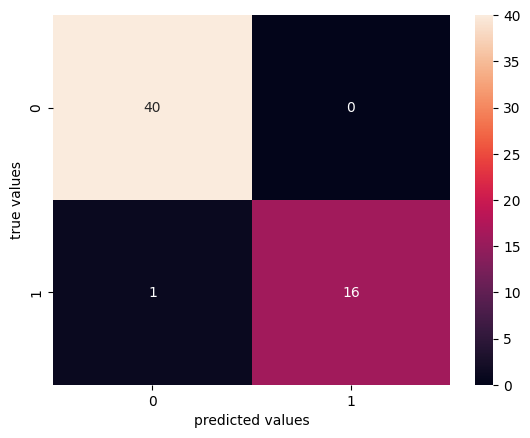

In [23]:
plt.figure()
sns.heatmap(confusion_matrix,annot=True)
plt.xlabel('predicted values')
plt.ylabel('true values')
plt.show()

In [ ]:
'''if we want to plot the result and view the data before and after
classification, plot the 3d of reduced data and color it with y_pred(
ie, the result)'''



In [24]:
y_pred_full=grid_search_svc.predict(x)

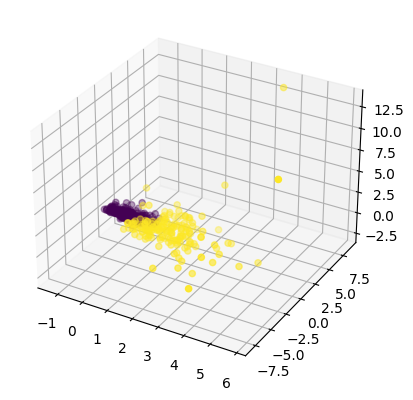

In [25]:
fig=plt.figure()
sub=fig.add_subplot(111,projection='3d')
sub.scatter(x['col1'],x['col2'],x['col3'],c=y_pred_full)
plt.show()


2. Logistic Regression

In [26]:
x_train_lr,x_test_lr,y_train_lr,y_test_lr=train_test_split(x,y,test_size=0.1,random_state=86)


In [27]:
param_grid_lr={
    'C':[0.01,0.1,1,10,100],
    'solver':['liblinear','saga','newton-cg','lbfgs','sag']}

lr=LogisticRegression(max_iter=7000,random_state=23)
grid_search_lr=GridSearchCV(lr,param_grid_lr,cv=10)
grid_search_lr.fit(x_train_lr,y_train_lr)



GridSearchCV(cv=10,
             estimator=LogisticRegression(max_iter=7000, random_state=23),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'solver': ['liblinear', 'saga', 'newton-cg', 'lbfgs',
                                    'sag']})

In [28]:
y_pred_lr=grid_search_lr.predict(x_test_lr)

In [29]:
accuracy_lr=f1_score(y_test_lr,y_pred_lr)
accuracy_lr

0.9500000000000001

In [ ]:
'''95% for this model is also good.we can use it for future predictions.'''

3. Random Forest

In [30]:
x_train_rf,x_test_rf,y_train_rf,y_test_rf=train_test_split(x,y,test_size=0.1,random_state=20)

In [ ]:
'''randomizedsearchCV is faster than gridsearchCV, so, lets use it here.'''

In [31]:
param_grid_rf = {
    'n_estimators':randint(100,1000),  
    'max_depth':[5,10,20,None],      
    'min_samples_split':randint(2,20), 
    'min_samples_leaf':randint(1,10),  
    'criterion':['gini','entropy']     
}
rf=RandomForestClassifier(random_state=42)
random_search=RandomizedSearchCV(rf,param_grid_rf,cv=5,n_iter=20,random_state=42,n_jobs=-1)
random_search.fit(x_train_rf,y_train_rf)



RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 20, None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7cdf63e9b370>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7cdf63e9bc70>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7cdf63e2ed70>},
                   random_state=42)

In [32]:
y_pred_rf=random_search.predict(x_test_rf)

In [33]:
accuracy_rf=f1_score(y_test_rf,y_pred_rf)
accuracy_rf

0.9166666666666666

4. KMean

In [ ]:

'''using kmeans we can find out the centroid of the clusters(ie the mean
value of the attributes), thus we can get an idea of the values of 
30 attributes which decides wheather the cancer is malignant or benign.'''

In [34]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [35]:
df_kmean=df.drop('diagnosis',axis=1)
df_kmean

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [36]:
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df_kmean)

In [37]:
x_kmean=pd.DataFrame(df_scaled,columns=df_kmean.columns)
x_kmean

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [38]:
y_test_kmean=df['diagnosis']
y_test_kmean


0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [ ]:
'''lets find out the number of clusters to be formed from the elbow plot.'''

In [39]:
inertia=[]
for k in range(1,11):
    kmeans=KMeans(n_init='auto',n_clusters=k,random_state=42)
    kmeans.fit(x_kmean)
    inertia.append(kmeans.inertia_)



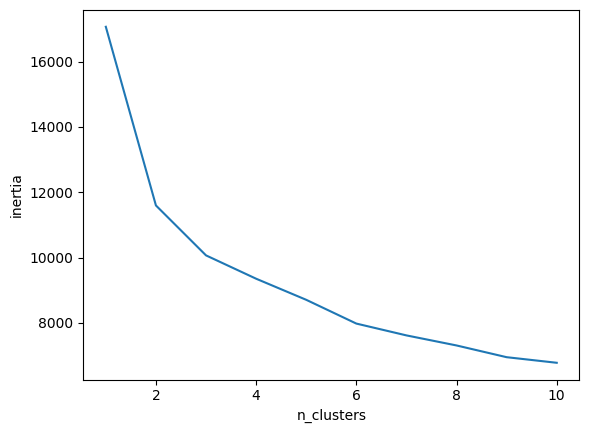

In [40]:
plt.figure()
plt.plot(range(1,11),inertia)
plt.xlabel("n_clusters")
plt.ylabel("inertia")
plt.show()

In [ ]:
'''from the plot Elbow point is 2. so lets take cluster no=2.

In [41]:
kmeans=KMeans(n_clusters=2,n_init='auto',random_state=9,)
kmeans.fit(x_kmean)
y_pred_kmean=kmeans.predict(x_kmean)

In [42]:
accuracy_kmean=f1_score(y_test_kmean,y_pred_kmean)
accuracy_kmean

0.8749999999999999

In [ ]:
'''accuracy of the model is low as compared to other models.but lets 
use this model for now to get the mean values(cluster centers) of 
attributes of cancer data.

In [43]:
centroids=kmeans.cluster_centers_
centroids

array([[-0.48677585, -0.24278217, -0.50264928, -0.48100231, -0.28970632,
        -0.50038248, -0.56494861, -0.57746231, -0.29773585, -0.11313275,
        -0.42589487, -0.02179192, -0.4265603 , -0.40154836, -0.00606408,
        -0.34186354, -0.31568456, -0.38077004, -0.06808833, -0.19927499,
        -0.51920227, -0.25513563, -0.53177588, -0.50030552, -0.29509774,
        -0.47017523, -0.51882214, -0.56907669, -0.29577329, -0.30278364],
       [ 0.98649786,  0.49202131,  1.01866689,  0.97479724,  0.5871176 ,
         1.014073  ,  1.14492245,  1.17028266,  0.60339021,  0.22927434,
         0.86311672,  0.04416341,  0.86446528,  0.8137762 ,  0.01228944,
         0.69281919,  0.63976499,  0.77166695,  0.13798752,  0.40384985,
         1.05221312,  0.51705679,  1.07769473,  1.01391704,  0.59804381,
         0.95285513,  1.05144274,  1.15328841,  0.5994129 ,  0.61362004]])

In [44]:
mean_values=scaler.inverse_transform(centroids)
mean_values

array([[1.24133780e+01, 1.82463517e+01, 7.97659055e+01, 4.85766404e+02,
        9.22893963e-02, 7.79376378e-02, 4.38013142e-02, 2.65316640e-02,
        1.73006824e-01, 6.19995538e-02, 2.87169816e-01, 1.20484252e+00,
        2.00437454e+00, 2.20862992e+01, 7.02278740e-03, 1.93613675e-02,
        2.23728205e-02, 9.44874278e-03, 1.99799501e-02, 3.26807165e-03,
        1.37619659e+01, 2.41104724e+01, 8.94079003e+01, 5.95981102e+02,
        1.25636719e-01, 1.80354357e-01, 1.64044743e-01, 7.72323648e-02,
        2.71792913e-01, 7.84819685e-02],
       [1.76007021e+01, 2.14039894e+01, 1.16699840e+02, 9.97632447e+02,
        1.04610319e-01, 1.57849894e-01, 1.79992074e-01, 9.42895213e-02,
        1.97688830e-01, 6.44149468e-02, 6.44314894e-01, 1.24119468e+00,
        4.61234574e+00, 7.73240319e+01, 7.07784574e-03, 3.78743617e-02,
        5.11887234e-02, 1.65533564e-02, 2.16819521e-02, 4.86257979e-03,
        2.13503191e+01, 2.88523936e+01, 1.43442660e+02, 1.45735638e+03,
        1.46011383e-01,

In [45]:
column_names=x_kmean.columns
column_names=column_names.tolist()
column_names

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [46]:
mean_values_B=mean_values[0,:]
mean_values_B=pd.DataFrame(mean_values_B)
mean_values_B=mean_values_B.transpose()
mean_values_B



,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,12.413378,18.246352,79.765906,485.766404,0.092289,0.077938,0.043801,0.026532,0.173007,0.062,...,13.761966,24.110472,89.4079,595.981102,0.125637,0.180354,0.164045,0.077232,0.271793,0.078482


In [47]:
mean_values_M=mean_values[1,:]
mean_values_M=pd.DataFrame(mean_values_M)
mean_values_M=mean_values_M.transpose()
mean_values_M

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.600702,21.403989,116.69984,997.632447,0.10461,0.15785,0.179992,0.09429,0.197689,0.064415,...,21.350319,28.852394,143.44266,1457.356383,0.146011,0.404052,0.491352,0.190348,0.327127,0.095019


In [48]:
mean_values_B.columns=column_names
mean_values_M.columns=column_names
mean_values_M

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.600702,21.403989,116.69984,997.632447,0.10461,0.15785,0.179992,0.09429,0.197689,0.064415,...,21.350319,28.852394,143.44266,1457.356383,0.146011,0.404052,0.491352,0.190348,0.327127,0.095019


In [49]:
mean_values_B

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,12.413378,18.246352,79.765906,485.766404,0.092289,0.077938,0.043801,0.026532,0.173007,0.062,...,13.761966,24.110472,89.4079,595.981102,0.125637,0.180354,0.164045,0.077232,0.271793,0.078482


**Conclusion**

In [ ]:
'''
1)we made exploratory data analysis of the data.
2)designed 2-3 models to predict the type of cancer(malignant or benign)
3)designed a plot to view how efficiently the cancer is classified 
  if an undiagnosed data set is given.
4)found the mean values of attributes for both types of cancers.'''



In [ ]:
#pls correct me if there are any mistakes, upvote if you like my work! :)
#thanks